In [2]:
import QuantLib as ql
import pandas as pd

In [12]:
today = ql.Date(2, ql.May, 2024)
ql.Settings.instance().evaluationDate = today

In [14]:
today

Date(2,5,2024)

In [16]:
schedule = ql.Schedule(
    ql.Date(8, ql.February, 2023),
    ql.Date(8, ql.February, 2028),
    ql.Period(6, ql.Months),
    ql.TARGET(),
    ql.Following,
    ql.Following,
    ql.DateGeneration.Backward,
    False,
)
settlement_days = 3
face_amount = 10_000
coupons = [0.03]
payment_day_counter = ql.Thirty360(ql.Thirty360.BondBasis)

bond = ql.FixedRateBond(
    settlement_days, face_amount, schedule, coupons, payment_day_counter
)

In [18]:
print(bond.settlementDate())

May 7th, 2024


In [20]:
print(bond.settlementDate(ql.Date(31, ql.May, 2027)))

June 3rd, 2027


In [22]:
print(bond.accruedAmount())

0.7416666666666627


In [24]:
print(bond.accruedAmount(ql.Date(9, ql.May, 2027)))

0.7583333333333275


In [26]:
print(bond.accruedAmount(bond.settlementDate()))

0.7416666666666627


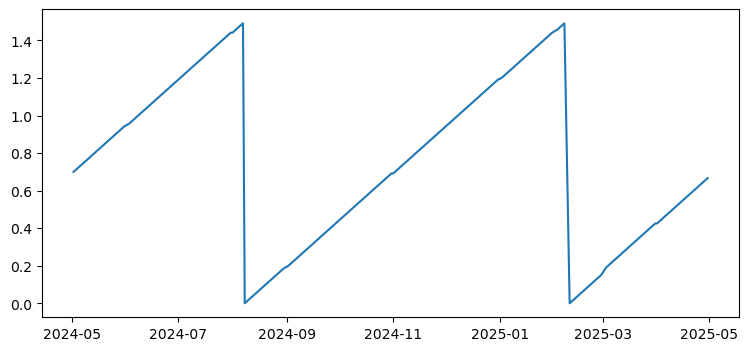

In [28]:
dates = [
    today + i for i in range(365) if ql.TARGET().isBusinessDay(today + i)
]
accruals = [bond.accruedAmount(d) for d in dates]

from matplotlib import pyplot as plt

ax = plt.figure(figsize=(9, 4)).add_subplot(1, 1, 1)
ax.plot([d.to_date() for d in dates], accruals, "-");

In [30]:
pd.DataFrame(
    [(c.date(), c.amount()) for c in bond.cashflows()],
    columns=("date", "amount"),
    index=range(1, len(bond.cashflows()) + 1),
).style.format({"amount": "{:.2f}"})

,date,amount
1,"August 8th, 2023",150.00
2,"February 8th, 2024",150.00
3,"August 8th, 2024",150.00
4,"February 10th, 2025",151.67
5,"August 8th, 2025",148.33
6,"February 9th, 2026",150.83
7,"August 10th, 2026",150.83
8,"February 8th, 2027",148.33
9,"August 9th, 2027",150.83
10,"February 8th, 2028",149.17


In [32]:
bond.cleanPrice(
    0.035,
    ql.Thirty360(ql.Thirty360.BondBasis),
    ql.Compounded,
    ql.Semiannual,
)

98.25259209893974